In [1]:
import pandas as pd
from datetime import datetime, timedelta
import time
import numpy as np
import pickle
import random
import csv
from IPython.display import clear_output
from matplotlib import pyplot as plt
import copy

In [2]:
import vk_api

In [3]:
vk_session = vk_api.VkApi('your api credentials')

In [4]:
vk = vk_session.get_api()

# Preparing the data

In [5]:
data = pd.read_csv('total_users_with_subscribtions_hashed.csv')

In [6]:
data = data[data['country'] == 'Russia']

In [7]:
data

,user_id,class,gender,age,country,city,political,life_views,people_views,subscribtions
0,2541,nowar,M,37.0,Russia,Saint Petersburg,NaN,NaN,NaN,"[2480895, 1, 807, 1687770, 73936928, -32041317..."
1,5681,nowar,F,NaN,Russia,Saint Petersburg,NaN,NaN,NaN,"[174461882, 30878367, -25336774, -152624627, -..."
2,17106,nowar,M,NaN,Russia,Moscow,NaN,NaN,NaN,"[54558184, 3202872, 5522163, 13451024, 1179150..."
3,21250,nowar,F,NaN,Russia,Saint Petersburg,NaN,красота и искусство,NaN,"[668369, 448765, 9231, 167430, 749748, 3192922..."
4,24621,nowar,F,38.0,Russia,NaN,NaN,NaN,NaN,"[1190088, 578183, 840386, 1008090, 1021723, 11..."
...,...,...,...,...,...,...,...,...,...,...
16331,765238428,z,F,22.0,Russia,Stavropol,NaN,NaN,NaN,"[504722293, -217406760]"
16332,765923551,z,M,70.0,Russia,Novokuznetsk,NaN,NaN,NaN,"[97382786, 140503071, 693367358, 175697422, 46..."
16342,773342698,z,M,14.0,Russia,Vichuga,NaN,NaN,NaN,[]
16344,773551735,z,M,16.0,Russia,Ostrogozhsk,NaN,NaN,NaN,"[91274193, 149093756, 139195124, 58688499, -21..."


In [620]:
total_list = []
for d in data['subscribtions']:
    if not pd.isna(d):
        total_list += d[1:-1].split(', ')

In [621]:
unique_values = list(set(total_list))[1:] #total number of unique subscribtions (groups)

In [622]:
len(unique_values)

572310

In [623]:
len(total_list)

1683011

In [624]:
unique_values.sort()

In [625]:
total_list1 = copy.deepcopy(total_list)
total_list1.sort()

In [626]:
total_list1 = total_list1[total_list1.index(unique_values[0]):]

In [627]:
unique_values = np.array([int(a) for a in unique_values])

In [628]:
total_list1 = np.array([int(a) for a in total_list1])

In [629]:
unique_more20 = [] #number of groups, for which 20 or more users from the dataset subscribed

i = 0

start = time.time()

for i in range(len(unique_values)):
    
    if np.mod(i,10000) == 0:
        print(i, time.time() - start)
        
    count = np.nonzero(total_list1 == unique_values[i])[-1][-1]
    
    total_list1 = total_list1[count:]
    if count > 19:
        unique_more20.append(unique_values[i])

0 7.343292236328125e-05
10000 7.9746856689453125
20000 19.171082496643066
30000 29.984872579574585
40000 39.105794191360474
50000 47.73936319351196
60000 56.83745193481445
70000 64.9407868385315
80000 72.98810386657715
90000 80.66247248649597
100000 88.81097531318665
110000 95.97028493881226
120000 102.47907567024231
130000 108.6470160484314
140000 115.32532024383545
150000 120.84379315376282
160000 126.85107088088989
170000 132.54225969314575
180000 138.69094800949097
190000 144.48482012748718
200000 149.70328664779663
210000 154.95831966400146
220000 159.62292551994324
230000 163.65556049346924
240000 167.46168684959412
250000 171.28032040596008
260000 175.16255736351013
270000 178.9818377494812
280000 182.36471724510193
290000 185.19293761253357
300000 187.74425673484802
310000 190.1939878463745
320000 192.46783542633057
330000 194.69872760772705
340000 196.66456365585327
350000 198.54789018630981
360000 200.37155652046204
370000 202.46074724197388
380000 204.33383440971375
390000 2

In [630]:
len(unique_more20)

11110

In [631]:
main_matrix = np.zeros((len(data['user_id']), len(unique_more20))) 
#matrix, where rows - users, columns - publics, and elements is if the user subscribed for the group or not

In [632]:
main_matrix.shape

(10574, 11110)

In [633]:
user_ids = np.zeros(len(data['user_id']))
main_matrix = np.zeros((len(data['user_id']), len(unique_more20)))

start = time.time()

enum = np.array(data.index)

k = 0

for i in enum:
    if np.mod(k,100) == 0:
        print(k, time.time() - start)
    user_ids[k] = data['user_id'][i]
    subs = data['subscribtions'][i]
    if not pd.isna(subs):
        subs = subs[1:-1].split(', ')
        try:
            subs = np.array([int(a) for a in subs])
            for s in subs:
                if s in unique_more20:
                    ind = np.nonzero(unique_more20 == s)[-1][-1]
                    main_matrix[k][ind] = 1
        except:
            pass
    k+=1

0 0.0003952980041503906
100 3.8106648921966553
200 8.239627122879028
300 12.009008169174194
400 16.335641622543335
500 20.835960149765015
600 24.65762162208557
700 29.29636836051941
800 33.25157856941223
900 38.94030833244324
1000 43.352381229400635
1100 50.22446012496948
1200 56.91891264915466
1300 62.139400005340576
1400 66.11484098434448
1500 72.1541314125061
1600 78.52116441726685
1700 86.49870276451111
1800 93.54730677604675
1900 100.79982733726501
2000 106.5584831237793
2100 112.24214434623718
2200 118.02418422698975
2300 125.83971929550171
2400 130.80824756622314
2500 136.25104975700378
2600 142.52357006072998
2700 147.49945425987244
2800 152.09889936447144
2900 155.7544436454773
3000 159.61939668655396
3100 163.71335554122925
3200 165.77031469345093
3300 168.64761567115784
3400 174.70261192321777
3500 179.24325966835022
3600 183.8737087249756
3700 189.36415553092957
3800 195.694349527359
3900 201.37732195854187
4000 208.26186108589172
4100 214.68644165992737
4200 220.1704730987

In [732]:
np.average(main_matrix.sum(axis = 1)) #average number of subscribtions per user

57.85303574806128

In [93]:
users_nowar = data[data['class'] == 'nowar']['user_id']
users_notnowar_inds = np.nonzero([not (int(u) in np.array(users_nowar)) for u in user_ids])
main_matrix_nowar = np.delete(main_matrix, users_notnowar_inds, axis = 0)

In [94]:
np.average(main_matrix_nowar.sum(axis = 1))

58.753508236729715

In [96]:
users_z = data[data['class'] == 'z']['user_id']
users_notz_inds = np.nonzero([not (int(u) in np.array(users_z)) for u in user_ids])
main_matrix_z = np.delete(main_matrix, users_notz_inds, axis = 0)

In [97]:
np.average(main_matrix_z.sum(axis = 1))

57.4484649122807

In [98]:
users_F = data[data['gender'] == 'F']['user_id']
users_notF_inds = np.nonzero([not (int(u) in np.array(users_F)) for u in user_ids])
main_matrix_F = np.delete(main_matrix, users_notF_inds, axis = 0)

users_M = data[data['gender'] == 'M']['user_id']
users_notM_inds = np.nonzero([not (int(u) in np.array(users_M)) for u in user_ids])
main_matrix_M = np.delete(main_matrix, users_notM_inds, axis = 0)

In [100]:
users_F_nowar = data[data['class'] == 'nowar'][data['gender'] == 'F']['user_id']
users_notF_inds = np.nonzero([not (int(u) in np.array(users_F_nowar)) for u in user_ids])
main_matrix_F_nowar = np.delete(main_matrix, users_notF_inds, axis = 0)

users_M_nowar = data[data['class'] == 'nowar'][data['gender'] == 'M']['user_id']
users_notM_inds = np.nonzero([not (int(u) in np.array(users_M_nowar)) for u in user_ids])
main_matrix_M_nowar = np.delete(main_matrix, users_notM_inds, axis = 0)

/tmp/ipykernel_136471/488868129.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  users_F_nowar = data[data['class'] == 'nowar'][data['gender'] == 'F']['user_id']
/tmp/ipykernel_136471/488868129.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  users_M_nowar = data[data['class'] == 'nowar'][data['gender'] == 'M']['user_id']


In [101]:
users_F_z = data[data['gender'] == 'F'][data['class'] == 'z']['user_id']
users_notF_inds = np.nonzero([not (int(u) in np.array(users_F_z)) for u in user_ids])
main_matrix_F_z = np.delete(main_matrix, users_notF_inds, axis = 0)

users_M_z = data[data['gender'] == 'M'][data['class'] == 'z']['user_id']
users_notM_inds = np.nonzero([not (int(u) in np.array(users_M_z)) for u in user_ids])
main_matrix_M_z = np.delete(main_matrix, users_notM_inds, axis = 0)

/tmp/ipykernel_136471/2899833514.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  users_F_z = data[data['gender'] == 'F'][data['class'] == 'z']['user_id']
/tmp/ipykernel_136471/2899833514.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  users_M_z = data[data['gender'] == 'M'][data['class'] == 'z']['user_id']


In [102]:
n_nowar = main_matrix_nowar.shape[0]
n_z = main_matrix_z.shape[0]
n_M = main_matrix_M.shape[0]
n_F = main_matrix_F.shape[0]

In [270]:
#get groups that are common for the 1st set of users, but uncommon for the other

def get_groups(matrix_users1, matrix_users2, f1 = 1, f2 = 1, n = 10):
    x1 = matrix_users1.sum(axis = 0)/matrix_users1.shape[0]
    x2 = matrix_users2.sum(axis = 0)/matrix_users2.shape[0]
    x11 = (x1*f2 - x2*(1-f1))/(f1+f2-1)
    x22 = (x2*f1 - x1*(1-f2))/(f1+f2-1)
    x = x11/(x11+x22)
    x = np.array([min(x0, 1) for x0 in x])
    y = (x11 + x22)/2
    x = x+x11*5
    inds_subs = np.argpartition(x, -n)[-n:]
    inds_subs = inds_subs[np.argsort(x[inds_subs])][::-1]
    group_ids = []
    for i in inds_subs:
        group_ids.append(unique_more20[i])
    groups = []
    for j in range(len(group_ids)):
        i = group_ids[j]
        if i>0:
            group = vk.users.get(user_ids = i)
            name = group[0]['first_name'], ' ', group[0]['last_name']
            print(j+1, np.round(x[inds_subs[j]]*100, 2), name)
        else:
            group = vk.groups.getById(group_id = -i, fields = ['name', 'activity'])
            name = group[0]['name']
            print(j+1, np.round(x[inds_subs[j]]*100, 2), name)#, '/', group[0]['activity'])
        groups.append(group[0])
    return group_ids

In [278]:
#get groups that are common for the both sets of users

def get_groups_common(matrix_users1, matrix_users2, f1 = 1, f2 = 1, n = 10):
    x1 = matrix_users1.sum(axis = 0)/matrix_users1.shape[0]
    x2 = matrix_users2.sum(axis = 0)/matrix_users2.shape[0]
    x11 = (x1*f2 - x2*(1-f1))/(f1+f2-1)
    x22 = (x2*f1 - x1*(1-f2))/(f1+f2-1)
    x = x11/(x11+x22)
    y = (x11 + x22)/2 - np.abs(x-0.5)
    inds_subs = np.argpartition(y, -n)[-n:]
    inds_subs = inds_subs[np.argsort(y[inds_subs])][::-1]
    group_ids = []
    for i in inds_subs:
        group_ids.append(unique_more20[i])
    groups = []
    for j in range(len(group_ids)):
        i = group_ids[j]
        if i>0:
            group = vk.users.get(user_ids = i)
            name = group[0]['first_name'], ' ', group[0]['last_name']
            print(j+1, np.round(y[inds_subs[j]]*100, 2), name)
        else:
            group = vk.groups.getById(group_id = -i, fields = ['name', 'activity'])
            name = group[0]['name']
            print(j+1, np.round(y[inds_subs[j]]*100, 2), name)#, '/', group[0]['activity'])
        groups.append(group[0])
    return group_ids

In [272]:
# get the most popular groups among this set of users

def get_most_popular(matrix_users1, n = 10):
    diff = matrix_users1.sum(axis = 0)/matrix_users1.shape[0]
    inds_subs = np.argpartition(diff, -n)[-n:]
    inds_subs = inds_subs[np.argsort(diff[inds_subs])][::-1]
    group_ids = []
    for i in inds_subs:
        group_ids.append(unique_more20[i])
    groups = []
    for j in range(len(group_ids)):
        i = group_ids[j]
        if i>0:
            group = vk.users.get(user_ids = i)
            name = group[0]['first_name'], ' ', group[0]['last_name']
            print(j+1, np.round(diff[inds_subs[j]]*100, 2), name)
        else:
            group = vk.groups.getById(group_id = -i, fields = ['name', 'activity'])
            name = group[0]['name']
            print(j+1, np.round(diff[inds_subs[j]]*100, 2), name)#, '/', group[0]['activity'])
        groups.append(group[0])
    return group_ids

In [273]:
ids = get_groups(main_matrix_M, main_matrix_F, n = 20) #men are subscribed for these, but women are not

1 110.51 Минобороны России
2 108.01 Новости RT на русском
3 104.91 ('Masha', ' ', 'Goncharova')
4 104.59 ('Barybina', ' ', 'Irina')
5 103.98 ('Maria', ' ', 'Belozerova')
6 103.89 AliExpress для авто
7 103.61 ('Eleonora', ' ', 'Yagoda')
8 103.55 ('Vova', ' ', 'Toldin')
9 103.52 ГАЗ
10 103.52 Яхта от 1000 евро, примеры яхт + руководство
11 103.5 ('Vlad', ' ', 'Teplinsk')
12 103.24 ('Maxim', ' ', 'Fokin')
13 103.24 ('Svetlana', ' ', 'Khorkhordina')
14 102.98 Телеканал Царьград
15 102.87 ('Ismail', ' ', 'Ikna')
16 102.78 Все об Оружии
17 102.78 ('Kira', ' ', 'Kozhevnikova')
18 102.78 Автолюбитель
19 102.68 Силачи Старой Школы
20 102.68 Оружие Человечества


In [254]:
ids = get_groups(main_matrix_F, main_matrix_M, n = 20) #women are subscribed for these, but men are not

1 131.86 Я же сама архитектор
2 126.53 Моя любимая дача
3 125.23 Моя дача
4 122.31 На все руки
5 120.02 Идеи для творчества и подарков своими руками
6 118.35 Моя квартира
7 118.09 Дизайн Ногтей 2023
8 117.89 Своими руками. Новинки
9 117.37 ДЕТСКИЕ ПОДЕЛКИ
10 117.28 Дом рукоделия. Handmade, дизайн и декор
11 116.99 Полезные советы
12 116.76 Дачница
13 115.4 ЕДИНАЯ РОССИЯ
14 114.82 Лучшие рецепты Повара
15 114.37 Женские хитрости
16 114.07 Маникюр | Ногти | Педикюр | 2023
17 113.23 🎁 Подарки с сюрпризами
18 113.14 Просто Вкусно
19 112.86 Уютный декор для дома. Handmade и рукоделие
20 112.6 585 Золотой


In [282]:
ids_interesting = []

In [283]:
#anti-war users are subscribed for these, but pro-war are not
ids = get_groups(main_matrix_nowar, main_matrix_z, f_nowar, f_z, n = 20)
ids_interesting += ids

1 149.95 Команда Навального
2 147.07 ('Alexey', ' ', 'Navalny')
3 146.82 Телеканал Дождь
4 137.27 «Медуза»
5 135.49 Михаил Ходорковский
6 134.61 Лентач
7 134.33 Ateo
8 129.51 Ёшкин Kрот
9 129.12 ('Ilya', ' ', 'Yashin')
10 128.85 ОВД-Инфо
11 127.0 Скажи Гордеевой
12 125.02 Сатира Без Позитива / Новости с овощебазы
13 124.37 Илья Варламов
14 122.07 Фонд борьбы с коррупцией (ФБК)
15 121.94 Наталья Васильевна Зубаревич
16 120.16 ВЕСЬ ПАРФЁНОВ
17 119.81 Настоящий Лентач
18 119.81 Быть Или
19 118.61 The Insider
20 117.3 Бессмертный барак


In [284]:
#pro-war users are subscribed for these, but anti-war are not
ids = get_groups(main_matrix_z, main_matrix_nowar, f_z, f_nowar, n = 20)
ids_interesting += ids

1 179.98 ЕДИНАЯ РОССИЯ
2 143.04 Правительство России
3 131.05 Минобороны России
4 127.47 ('Ramzan', ' ', 'Kadyrov')
5 125.97 Министерство просвещения Российской Федерации
6 125.51 Валентина Матвиенко
7 124.84 Сладков +
8 123.69 Фонд президентских грантов
9 123.58 Молодая Гвардия
10 122.43 Кузбасс сейчас
11 121.95 Росмолодёжь
12 120.89 Государственная Дума
13 120.67 Моя любимая дача
14 119.75 Сергей Цивилев
15 117.69 Объясняем.РФ
16 117.19 KADYROV_95 | АХМАТ
17 117.1 Совет Федерации
18 116.81 Путин В.В.
19 116.48 Бессмертный полк России
20 115.88 Сторонники «Единой России»


In [285]:
get_groups_common(main_matrix_M, main_matrix_F, n = 20)

1 6.97 ЕДИНАЯ РОССИЯ
2 5.5 Правительство России
3 4.79 Никита Михалков
4 3.64 Валентина Матвиенко
5 3.25 Комсомольская правда - KP.RU
6 3.02 Киномания ► Лучшие фильмы
7 3.01 ПАТРИОТЫ РОССИИ
8 3.0 Поддубный |Z|О|V|
9 2.24 СОВЕТСКИЙ ЭКРАН
10 2.22 5 интересных фактов
11 1.83 Прямая линия с Владимиром Путиным
12 1.82 Vежливые. Zлые. СВОи.
13 1.81 ('Nikolay', ' ', 'Andreev')
14 1.65 Сила в правде
15 1.53 Наука и факты | Что будет, если...?
16 1.47 ВКонтакте для бизнеса
17 1.46 ('Petr', ' ', 'Tolstoy')
18 1.42 Дмитрий Абзалов
19 1.38 Никита Михалков
20 1.35 Лепрозорий


[-18483909,
 -112292509,
 -26662151,
 -211210115,
 -15722194,
 -43215063,
 -4144008,
 -216220686,
 -37492055,
 -25346844,
 -115987924,
 -102422838,
 4950014,
 -156937378,
 -41041067,
 -19542789,
 354371846,
 -139652751,
 -213200875,
 -65960786]

In [287]:
ids = get_groups_common(main_matrix_z, main_matrix_nowar, f_z, f_nowar, n = 20)
ids_interesting += ids

1 5.45 Телеканал Царьград
2 3.94 Киномания - Лучшие фильмы
3 3.39 КиноКайф - Лучшие фильмы
4 2.95 Mash | Мэш
5 2.59 Интерьер и декор
6 2.34 Культура.РФ
7 2.21 VK Музыка
8 2.13 Наука и факты | Что будет, если...?
9 1.91 Школа ремонта
10 1.8 Мои любимые строки
11 1.67 КОНТ. Интересное в мире и интернете
12 1.6 Нетолерантная Русь
13 1.53 Евгений Федоров :: официальная страница
14 1.42 Психология человека
15 1.4 Психология мыслей
16 1.4 Леонардо Дайвинчик
17 1.39 ('Igor', ' ', 'Strelkov')
18 1.39 Жэньминь жибао онлайн | Новости Китая
19 1.36 ('Vitaly', ' ', 'Uglanov')
20 1.34 Роскосмос


In [288]:
ids = get_most_popular(main_matrix_z, n = 30)
ids_interesting += ids

1 15.19 ЕДИНАЯ РОССИЯ
2 9.57 Правительство России
3 9.55 Минобороны России
4 9.06 ('Ramzan', ' ', 'Kadyrov')
5 8.95 Никита Михалков
6 8.22 Новости RT на русском
7 7.88 Телеканал Царьград
8 7.7 Сладков +
9 7.54 РИА Новости
10 7.44 Государственная Дума
11 7.24 Дмитрий Абзалов
12 6.89 Вежливые Люди | Армия | Россия
13 6.83 Фонд президентских грантов
14 6.77 ВКонтакте
15 6.33 Путин В.В.
16 6.25 ('Dmitry', ' ', 'Medvedev')
17 6.1 Министерство просвещения Российской Федерации
18 6.04 ТАСС
19 6.04 Новинки Музыки | Новая Музыка 2023
20 5.95 Верую † Православие
21 5.87 Литература | Великие поэты
22 5.74 LIFE.ru
23 5.58 КиноКайф - Лучшие фильмы
24 5.55 Первый канал
25 5.5 Пранкеры Вован и Лексус
26 5.47 Бессмертный полк России
27 5.39 РОССИЯ
28 5.36 ПАТРИОТЫ РОССИИ
29 5.33 ЖИТЬ
30 5.24 Вежливые Люди / Армия / Россия / СВО


In [289]:
ids = get_most_popular(main_matrix_nowar, n = 30)
ids_interesting += ids

1 8.76 ВКонтакте
2 7.47 Литература | Великие поэты
3 7.47 Телеканал Царьград
4 7.29 ('Alexey', ' ', 'Navalny')
5 7.08 Телеканал Дождь
6 7.02 Лентач
7 6.71 Команда Навального
8 6.62 Юмор Шрёдингера
9 6.56 Никита Михалков
10 6.25 Новости RT на русском
11 6.22 Лепра
12 6.04 Я люблю русский язык!
13 5.89 РИА Новости
14 5.89 ВКонтакте для бизнеса
15 5.86 «Медуза»
16 5.86 ('Pavel', ' ', 'Durov')
17 5.58 Книги
18 5.55 РБК
19 5.31 КиноКайф - Лучшие фильмы
20 5.25 Ateo
21 5.22 Идеи дизайна интерьера
22 5.03 Science|Наука
23 5.03 Интеллектуальный юмор
24 4.85 Ёшкин Kрот
25 4.85 Верую † Православие
26 4.82 Киномания ► Лучшие фильмы
27 4.82 Михаил Ходорковский
28 4.73 Минобороны России
29 4.67 ТАСС
30 4.64 Дзен


In [290]:
ids_interesting = list(set(ids_interesting))

In [116]:
def get_groups_name_and_coords(ids):
    
    ys = []
    xs = []
    names = []
    
    for s in ids:
        ind = np.nonzero(unique_more20 == s)[-1][-1]
        
        x_nowar = main_matrix_nowar[:,ind].sum(axis = 0)/main_matrix_nowar.shape[0]
        x_z = main_matrix_z[:,ind].sum(axis = 0)/main_matrix_z.shape[0]
        
        xn1 = (x_nowar*f_z - x_z*(1-f_nowar))/(f_nowar+f_z-1)
        xz1 = (x_z*f_nowar - x_nowar*(1-f_z))/(f_nowar+f_z-1)
        x = xn1/(xn1+xz1)
        
        if x<0:
            x = 0
        if x>1:
            x = 1
            
        y = (xn1 + xz1)/2
        
        ys.append(y)
        xs.append(x)
        if s>0:
            group = vk.users.get(user_ids = s)
            name = group[0]['first_name'] + ' ' + group[0]['last_name']
        else:
            group = vk.groups.getById(group_id = -s)
            name = group[0]['name']
        print(name)
        names.append(name)
    return xs, ys, names

In [117]:
def get_groups_coords(ids):
    
    ys = []
    xs = []
    
    for s in ids:
        ind = np.nonzero(unique_more20 == s)[-1][-1]
        x_nowar = main_matrix_nowar[:,ind].sum(axis = 0)/main_matrix_nowar.shape[0]
        x_z = main_matrix_z[:,ind].sum(axis = 0)/main_matrix_z.shape[0]
        xn1 = (x_nowar*f_z - x_z*(1-f_nowar))/(f_nowar+f_z-1)
        xz1 = (x_z*f_nowar - x_nowar*(1-f_z))/(f_nowar+f_z-1)
        x = xn1/(xn1+xz1)
        y = (xn1 + xz1)/2
        ys.append(y)
        xs.append(x)
        
    return xs, ys

In [119]:
f_nowar = 0.67
f_z = 0.96
df_nowar = 0.07
df_z = 0.03

In [291]:
xs, ys, names = get_groups_name_and_coords(ids_interesting)

Pavel Durov
Команда Навального
VK Музыка
Пранкеры Вован и Лексус
Я люблю русский язык!
Science|Наука
Минобороны России
The Insider
Dmitry Medvedev
Ramzan Kadyrov
Лентач
ВЕСЬ ПАРФЁНОВ
Сергей Цивилев
Литература | Великие поэты
РОССИЯ
КиноКайф - Лучшие фильмы
ВКонтакте
Путин В.В.
Ateo
Жэньминь жибао онлайн | Новости Китая
ПАТРИОТЫ РОССИИ
Илья Варламов
Валентина Матвиенко
Моя любимая дача
Фонд борьбы с коррупцией (ФБК)
Государственная Дума
Роскосмос
Скажи Гордеевой
Психология человека
Наталья Васильевна Зубаревич
РИА Новости
Школа ремонта
Mash | Мэш
Евгений Федоров :: официальная страница
Бессмертный полк России
Новости RT на русском
Интерьер и декор
Первый канал
Объясняем.РФ
Vitaly Uglanov
Никита Михалков
ВКонтакте для бизнеса
Книги
Сладков +
Бессмертный барак
KADYROV_95 | АХМАТ
Киномания ► Лучшие фильмы
Леонардо Дайвинчик
Вежливые Люди / Армия / Россия / СВО
ЕДИНАЯ РОССИЯ
РБК
Культура.РФ
Дзен
Киномания - Лучшие фильмы
Мои любимые строки
Фонд президентских грантов
Наука и факты | Что буде

In [292]:
y = (main_matrix_nowar.sum(axis = 0)/main_matrix_nowar.shape[0] 
     + main_matrix_z.sum(axis = 0)/main_matrix_z.shape[0])/2
inds = np.nonzero([(i>0.01) and (i<0.04) for i in y])[0]
inds = random.sample(list(inds), 50)
inds_random = [unique_more20[i] for i in inds]

In [293]:
xs_random, ys_random, names_random = get_groups_name_and_coords(inds_random)

Невероятный мир
Личный повар
Анатолий Вассерман
PostNews
Имбирь
Сила в правде
Простые рецепты
Идеи Handmade
САЛАТЫ | Лучшие рецепты
Интересные штуки
Олимпийский комитет России
СЛАВЯНСКИЙ ВЕСТНИК
Анатолий Шарий | Новости | Украина | Sharij.net
Вокруг света
Проповеди Андрея Ткачева
Загородный дом (Дача) или во саду ли, в огороде
MDK
Плохой сигнал
ЧВК Вагнер
Я в шоке!
Вечерний Ургант
Леонид Корнилов
iFeed
НОД :: официальная группа
Apteka.ru / Аптека.ру
Мой сад - дачный советник
Бессмертный полк России
Φ ι λ ο σ ο φ ί α
Искусство реальности
🎁 Подарки с сюрпризами
Невские Новости
Pro Ремонт
ГЛАВНОВОСТИ
НЕ ПОВЕРИШЬ!
Хэнк Муди
Психология мыслей
Атеист
Москва. Главное!
Путешествия по городам России
Православные шутят!
✯☭ ✯Агенты Кремля ✯☭ ✯ #ZV
Шредингер Шутит
Голос Мордора
Циник
Молодая Гвардия
другое кино
Лайфхак
Наука и Техника
Культура & Искусство
Smart Money | Бизнес журнал


In [524]:
xs_all, ys_all, names_all = get_groups_name_and_coords(unique_more20)

In [128]:
xs_all, ys_all = get_groups_coords(unique_more20)

In [130]:
symbols = ['\n', '.', ',', '-', '–', ':', '!', '?', '»', '«', '_', '—', '\u200b', ')', '(', '#', '|', '\\', '/']

In [131]:
import pymorphy2 as pm2
morph = pm2.MorphAnalyzer()

In [132]:
def process_text(text):
    for s in symbols:
        text = text.replace(s,' ')
    text = text.lower()
    text_split = text.split()
    text_normal = []
    for w in text_split:
        text_normal.append(morph.parse(w)[0].normal_form)
#     text = ' '.join(map(str,text_normal))
    return text_normal

# Nice plots

In [294]:
x_nowar = main_matrix_nowar.sum(axis = 0)/main_matrix_nowar.shape[0]

In [295]:
x_z = main_matrix_z.sum(axis = 0)/main_matrix_z.shape[0]

In [296]:
xn1 = (x_nowar*f_z - x_z*(1-f_nowar))/(f_nowar+f_z-1)
xz1 = (x_z*f_nowar - x_nowar*(1-f_z))/(f_nowar+f_z-1)

In [297]:
x = xn1/(xn1+xz1) 

In [298]:
for i in range(len(x)):
    if x[i]<0:
        x[i] = 0
    if x[i]>1:
        x[i]=1

In [299]:
y = (xn1 + xz1)/2

In [144]:
inds = [(x1>0) and (x1<1) for x1 in x]
x = x[inds]
y = y[inds]

In [145]:
def get_centered_coords(search_words, xs_all, ys_all):
    
    xs = []
    ys = []
    names = []
    
    for i in range(len(xs_all)):
        if xs_all[i] < 0:
            xs_all[i] = 0
        if xs_all[i] > 1:
            xs_all[i] = 1
        words = process_text(names_all[i])
        cond = False
        for w in search_words:
            if w in words:
                cond = True
        if cond:
            print(names_all[i])
            xs.append(xs_all[i])
            ys.append(ys_all[i])
            names.append(names_all[i])
    
    return xs, ys, names

In [146]:
def make_hist(xs, ys, n):
    
    ints = np.linspace(0,1,n+1)
    x_pos =  np.linspace(0,1,n+1)[:-1] + 1/n/2
    hs = np.zeros(n)
    
    for i in range(len(ints)):
        
        for j in range(len(xs)):
            
            if (xs[j]>ints[i]) and (xs[j]<ints[i+1]):
                
                hs[i] += ys[j]
                
    return x_pos, hs

In [147]:
%matplotlib notebook

In [148]:
def average_pos(xs, ys):
    
    xs = np.array(xs)
    ys = np.array(ys)
    
    n = len(xs)
    mu = np.average(xs, weights = ys)
    pmean = np.average(ys)
#     sigma2 = np.average((xs - mu)**2, weights = ys)
#     se = np.sqrt(sigma2/n)
    
    se2 = n/(n-1)/np.sum(ys**2) * (np.sum((ys*xs - pmean*mu)**2) - 2*mu*np.sum((ys - pmean)*(ys*xs - pmean*mu)) +
                             mu**2*np.sum((ys-pmean)**2))
    se = np.sqrt(se2)

    return mu, se

<IPython.core.display.Javascript object>


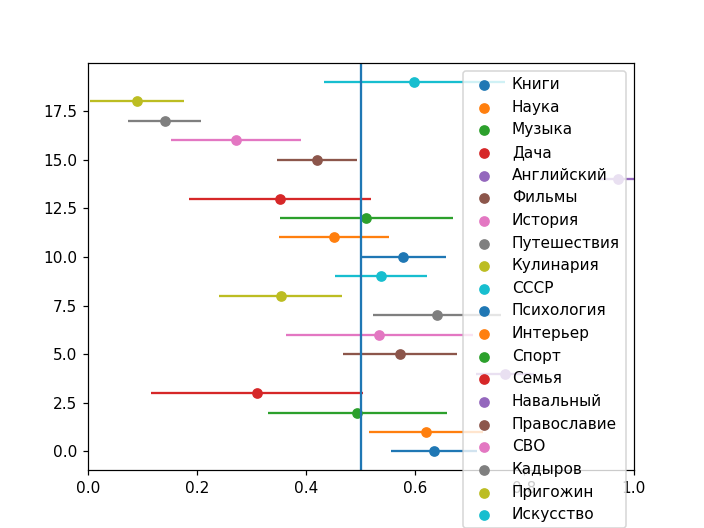

Город стихов и поэтов - Рифмоград
Красная книга
Литература
Художники и поэты
Горький. О книгах и чтении
Author Today | Автор Тудей - Книги онлайн
как в книге написано
«Книги и кофе»
Стивен Кинг и книги
У Окна | Литература и Искусство | Стихи
Книга и Чай
Мир чудесных фото и книг
Ольга Рожнева Писатель
Русский анализ книг
Мировая Поэзия
ЛЮБЛЮ ЧИТАТЬ | КНИГИ
Писатели и Философы
Книга в Ухе - аудиокниги
ЗНАНИЕ — СИЛА I Советские книги для всех
Всего лишь писатель
Лучшие книги
Большая книга знаний
Группа зооволонтера и поэта Алексея Прокурора
Союз писателей России. Официальная страница.
Поэзия СИ
Книги | Литература | Цитаты
НЕФИЛОСОФ | КНИГИ ПО ФИЛОСОФИИ
Цитаты из книг
Ассоциация союзов писателей и издателей России
«Никея» — книги о главном
Книги Владлена Татарского
Я рядом | Стихи, цитаты, поэзия
Книги. Издательство АСТ
Книга знаний
|| Книжные черви || Литература ● Книги ● Стихи
Modern Poetry / Современная Поэзия
Инструменты писателя и сценариста
Литературоведение и теория литературы
Книги

Строим свою дачу. Растим сад и огород.
Хочу на дачу
Идеи для сада | дача | ландшафт| огород
Дачный лайфхак
Дачная жизнь и полезные советы
Дачники | Сад| Огород| Ландшафт| строительство
Моя дача  2.0 | Дизайн и архитектура
ДНЕВНИК ДАЧНИКА: дача, огород, сад, цветы
➡ Моя Усадьба  Сад, ландшафт и дача. Подпишись
ВО САДУ ЛИ,  В ОГОРОДЕ -  с любовью к земле
Дачные Хитрости
Дачный советник
Строительство | дачные рецепты, дача, огород сад
Порядок. Всё для дома и дачи
Дачные хитрости. Сад. Строительство
Я садовод l Дача, сад, огород l Подпишись
ДАЧНЫЙ ФОРУМ "ВО САДУ ЛИ, В ОГОРОДЕ"
Мой Сад и Дача | Огород | Загородный дом
English Skazki
Begin English. Английский язык для всех
Английский язык под чашку кофе
Учим английский язык
English With Pleasure
Англия | Английский язык
USA. США. Английский язык - Всё об Америке
Английский каждый день | Endaily
Английский для лентяев
English | Английский язык
Английский язык
Визуальный английский | English
Английский язык.
Daily English: английский по фильма

СТАРЫЕ ФОТОГРАФИИ | История России и ее народов
История Античности
Российское военно-историческое общество - РВИО
История в фотографиях
Факты Истории • Доисторические Цивилизации
Необычная Россия | Факты| История |Армия|Новости
Российская Империя | Факты | История
Верим в Россию!  | Патриоты | Новости | История
Истории из жизни от домохозяек
Истории из жизни Домохозяек
Большая Игра | История и Факты
MILHISTORY|ВОЕННАЯ ИСТОРИЯ
Интересные факты | История России для ленивых
Моменты истории
ВСЕМИРНАЯ ИСТОРИЯ +
Военная история
История Человечества
Маленькие истории
История мира
История/History
История в фотографиях
факультатив по истории
Вселенная Истории
Невероятная история | Исторический журнал
Страницы истории
PRO History | История
История | HISTORY
Исторические и Интересные Факты
ПАМЯТЬ В КАДРАХ. ИСТОРИЯ
Факты из Истории
История России
Школьные истории
Турклуб My Way - активные путешествия
Туристическая барахолка Альпинистская барахолка
Подслушано Турция|Алания|Анталия|Стамбул|Туризм
Не

Простые и вкусные рецепты
Лучшие рецепты домашней кухни
Кухня ВКонтакте | Кулинария | Рецепты
Меню на день рождения: красиво, недорого, вкусно
Вкусные Кулинарные Рецепты |  Видео рецепты
Диета Дю - Диетические, Низкокалорийные Рецепты.
Кулинария | Отличная хозяйка, жена и мама
Дневник идеальной хозяйки | Рецепты | Здоровье
Хозяюшка | Рецепты и домашние хитрости
Кулинария
Рецепты и кулинария
Умная кухня
♥ Женские секреты и рецепты, дети, любовь, семья
Вкусные рецепты любящей жены
Кулинарные Хитрости| Вкусные рецепты
Меню Для Детей.Рецепты для всей семьи
Моя книга рецептов
Вкусные рецепты
Рецепт жизни. Наше здоровье
Вкусная и здоровая пища
МЯСО | Мужская кухня
Кулинария 2022
GIF рецепты
Кулинарная копилка 🍴 Готовим детям и мамам
Рецепты ПП: правильное питание, диетические
Лучшие рецепты
Простые рецепты со вкусом
Кулинарные Хитрости | Рецепты
Домашние заготовки и консервация - рецепты впрок
Салаты! Заготовки! Нарезки! Закуски! Рецепты!
1001 РЕЦЕПТ
Вкусно дома!❤ - Простые рецепты
Простые р

Just Sport | Бодибилдинг | Фитнес | ММА | ЗОЖ
Just Fitness | Фитнес Блог
SPORT RULES |MMA|Фитнес|Спорт
ЗОЖ в любом возрасте
Музыка для Спорта (Тренировок)
Больше, чем спорт
90-60-90 | Спортивные девушки
Спорт для Всех
За ЗОЖ
Программы тренировок и питания
Худеем вкусно! • Диетические рецепты • ЗОЖ
GYM BOSS — спорт/фитнес/саморазвитие
Funny Health • Здоровье • Красота • ЗОЖ
СПОРТ
Диетические рецепты. Правильное питание. Зож
Здоровье. Йога. Фитнес. Красота. ПП.
Yoga Job-Вакансии |эко|веган|зож|йога
Фитнес подруга
РЕЛЬЕФ /  фитнес / спорт / здоровье / питание
Сама себе тренер | Фитнес | Спорт
ANABOLISM — спорт / ММА / фитнес
СПОРТИВНАЯ НАЦИЯ — спорт / фитнес / MMA
Академия Эндорфин - Здоровье | Фитнес | GIF
ЗДОРОВЬЕ  + ЗОЖ | СПОРТ | ЙОГА | ЭКО
Вот это спорт!
Фитнес | Правильное питание | Здоровье
Sportwiki | Научный бодибилдинг и фитнес
Спортивная одежда | DFORIGINAL.COM
Фитнес для мозга | Facts
HARD TRAINING | Спортивный журнал
Программы тренировок · Упражнения · Питание
Спортивные стать

Волшебство - идеи творчества и декора, рукоделие
Кулинарное искусство
Мир Творчества
Искусство экономить
Идеи | Творческая мастерская | Хитрости
Дизайн  | арт, искусство, хобби, живопись
Идеи для творчества |Подарки СВОИМИ РУКАМИ
Первобытное искусство
Древнерусское Искусство
Magic Point | Красота. Творчество. Вдохновение
Вдохновение,идеи,куклы|народная,арт
Музей современного искусства АРТМУЗА
Российский Дом народного творчества
Русская литература. Живопись
Детские поделки, семейное творчество для детей
Искусство книжной графики и иллюстрации
Искусство | Ardezart
Арт-центр "Гаркундель"
Академическая Живопись
ИДЕИ для творчества
Арт-группа АТАКА
Шедевры искусства | ART
Artzoom. Искусство в деталях.
Вся творческая работа. Event hunter. Петербург
Бохо | Творческий стиль
Творчество, рукоделие и хобби - Сделано руками
Искусство Серебряного века
Академическая живопись
Event hunter - вся творческая работа Москва
Советская архитектура и монументальное искусство
Душевные иллюстрации | арт, искус

In [150]:
plt.figure()

word_lists = [
             ['книга', 'чтение', 'литература', 'поэзия', 'поэт', 'писатель'],
             ['наука', 'научный', 'технологии'],
             ['музыка', 'музыкальный'],
             ['дача', 'огород', 'дачный'],
             ['английский', 'english'],
             ['кино', 'фильм'],
             ['история', 'исторический'],
             ['путешествие', 'туризм', 'турист', 'путешествовать', 'туристический'],
             ['рецепт', 'кулинария', 'кухня', 'кулинарный', 'вкусно','вкусный'],
             ['ссср', 'советский'],
             ['психология', 'психологический'],
             ['интерьер', 'декор'],
             ['спорт', 'зож', 'тренировка', 'спортивный', 'тренироваться', 'фитнес'],
             ['семья', 'ребенок', 'родитель', 'родительство'],
             ['навальный', 'navalny', 'фбк'],
             ['православие', 'христианство', 'православный', 'христианский'],
             ['сво', 'z', 'zov'],
             ['кадыров', 'kadyrov'],
             ['пригожин', 'вагнер', 'чвк'],
             ['искусство', 'живопись', 'арт', 'творчество', 'творческий']]

labels = ['Книги', 'Наука', 'Музыка', 'Дача', 'Английский', 'Фильмы', 'История', 'Путешествия',
          'Кулинария', 'СССР', 'Психология', 'Интерьер', 'Спорт', 'Семья', 'Навальный', 'Православие',
          'СВО', 'Кадыров', 'Пригожин', 'Искусство']

# if results:
#     results_labels = [r[2] for r in results]
# else:
#     results = []
#     results_labels = []
results_labels = []
results = []
coords = []
    
for i in range(len(word_lists)):
    
    if labels[i] in results_labels:
        
#         print('already calculated')
        
        ind = results_labels.index(labels[i])
        
        xs_read, ys_read, _ = results[ind]
        
    else:
        
        w = word_lists[i]
        xs_read, ys_read, names_read = get_centered_coords(w, xs_all, ys_all)
        xh_read, yh_read = make_hist(xs_read, ys_read, 50)

        results.append([xs_read, ys_read, labels[i]])
    
    mu, se = average_pos(xs_read, ys_read)
    
    coords.append({'mu':mu, 'se':se, 'name':labels[i]})
    
    plt.scatter(mu, i, label = labels[i])
    plt.errorbar(mu, i, xerr = se)

#     if i<len(word_lists)-1:
#         plt.fill_between(xh_read, yh_read, alpha = 0.2, label = labels[i])
#     else:
#         plt.fill_between(xh_read, yh_read, alpha = 0.7, label = labels[i])
    
plt.xlim([0,1])
plt.legend()
plt.axvline(0.5)

In [151]:
coords_sorted = sorted(coords, key=lambda d: np.abs(d['mu']-0.5)) 

<IPython.core.display.Javascript object>


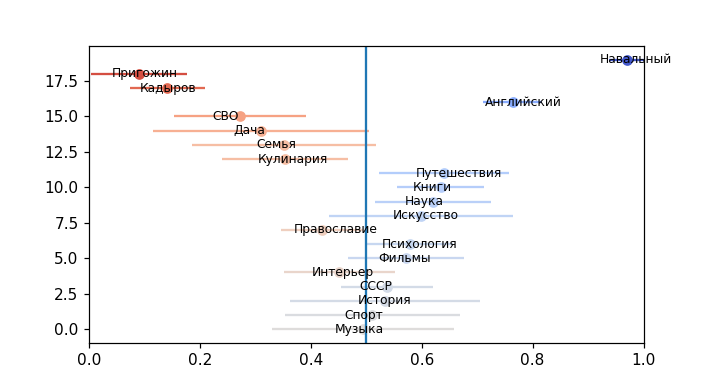

In [178]:
plt.figure(figsize = (6.5,3.5))

for i in reversed(range(len(coords))):
    
    plt.scatter(coords_sorted[i]['mu'], i, label = coords_sorted[i]['name'], color = plt.cm.coolwarm_r(coords_sorted[i]['mu']))
    plt.errorbar(coords_sorted[i]['mu'], i, xerr = coords_sorted[i]['se'], color = plt.cm.coolwarm_r(coords_sorted[i]['mu']))
    plt.text(coords_sorted[i]['mu']-0.05, i-0.25, s = coords_sorted[i]['name'], color = 'black', fontsize = 8)
    
plt.xlim([0,1])
# plt.legend()
plt.axvline(0.5)

plt.savefig('interests.pdf')

<IPython.core.display.Javascript object>


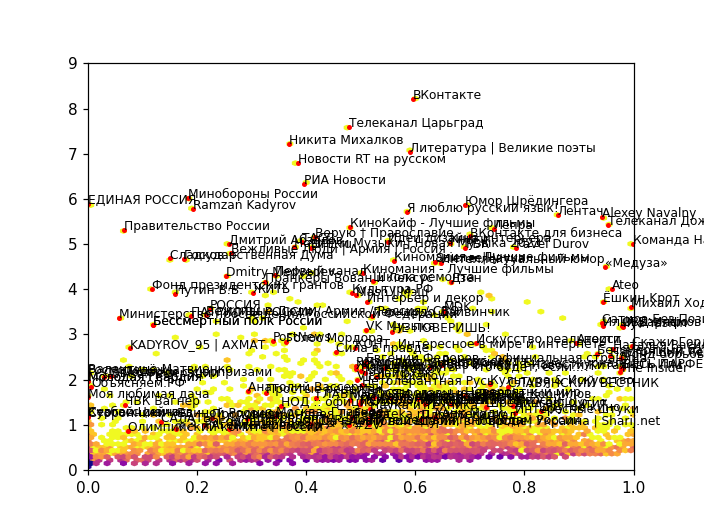

/tmp/ipykernel_136471/2994221663.py:14: UserWarning: Glyph 127873 (\N{WRAPPED PRESENT}) missing from current font.
  plt.savefig('publics.pdf')


In [300]:
plt.figure()
hb = plt.hexbin(x,y*100,gridsize=100,bins='log',cmap = 'plasma_r')
plt.scatter(xs_random, np.array(ys_random)*100, c = 'red', s = 5)
plt.scatter(xs, np.array(ys)*100, c = 'red', s = 5)
for i in range(len(xs_random)):
    plt.text(xs_random[i], np.array(ys_random[i])*100, s = names_random[i], color = 'black', fontsize = 8)
    
for i in range(len(xs)):
    plt.text(xs[i], np.array(ys[i])*100, s = names[i], color = 'black', fontsize = 8)#, fontfamily = 'monospace')

plt.xlim([0,1])
plt.ylim([0,9])

plt.savefig('publics.pdf')

<IPython.core.display.Javascript object>


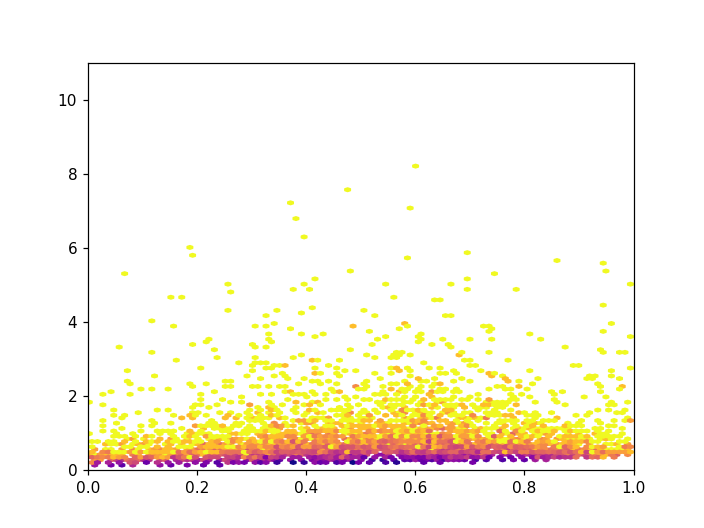

(0.0, 11.0)

In [164]:
plt.figure()
hb = plt.hexbin(x,y*100,gridsize=100,bins='log',cmap = 'plasma_r')
# plt.scatter(xs_random, np.array(ys_random)/len(user_ids1)*100, c = 'red', s = 5)
# plt.scatter(xs, np.array(ys)/len(user_ids1)*100, c = 'red', s = 5)
# for i in range(len(xs_random)):
#     plt.text(xs_random[i], np.array(ys_random[i])/len(user_ids1)*100, s = names_random[i], color = 'black', fontsize = 8)
    
# for i in range(len(xs)):
#     plt.text(xs[i], np.array(ys[i])/len(user_ids1)*100, s = names[i], color = 'black', fontsize = 8)#, fontfamily = 'monospace')

plt.xlim([0,1])
plt.ylim([0,11])

# Train the model

In [9]:
from sklearn.decomposition import TruncatedSVD 
import sklearn as sk

In [42]:
main_matrix.shape

(10574, 11110)

In [43]:
inds = [i for i in range(main_matrix.shape[0])]

In [44]:
random.seed(0)

In [45]:
random.shuffle(inds)

In [46]:
user_ids_s = np.zeros(len(user_ids))
main_matrix_s = np.zeros(main_matrix.shape)

In [47]:
for i in range(len(inds)):
    user_ids_s[i] = user_ids[inds[i]]
    main_matrix_s[i,:] = main_matrix[inds[i],:]

In [48]:
labels_gender = []
labels_class = []
for u in user_ids_s:
    g = data[data['user_id'] == u]['gender'].values[0]
    if g == 'F':
        labels_gender.append(1)
    else:
        labels_gender.append(0)
    c = data[data['user_id'] == u]['class'].values[0]
    if c == 'nowar':
        labels_class.append(1)
    else:
        labels_class.append(0)

In [49]:
len(np.where(np.array(labels_class) == 0)[0])

7296

In [50]:
ind_remove = np.nonzero(main_matrix_s.sum(axis = 1) < 2)[0]

In [51]:
main_matrix_s1 = np.delete(main_matrix_s, ind_remove, axis = 0)
user_ids_s1 = np.delete(user_ids_s, ind_remove)
labels_gender1 = np.delete(labels_gender, ind_remove)
labels_class1 = np.delete(labels_class, ind_remove)
user_ids_s1 = np.delete(user_ids_s, ind_remove)

In [20]:
#remove some z users to make classes balanced

In [54]:
inds_keep = []

for i in range(len(users_true_nowar)):
    try:
        inds_keep.append(np.where(user_ids_s1 == users_true_nowar[i])[0][0])
    except:
        pass
print(len(inds_keep))
    
for i in range(len(users_true_z)):
    try:
        inds_keep.append(np.where(user_ids_s1 == users_true_z[i])[0][0])
    except:
        pass

72


In [55]:
len(inds_keep)

232

In [56]:
inds_keep = list(set(inds_keep + list(np.where(np.array(labels_class1) == 1)[0])))

inds = [i for i in range(main_matrix_s1.shape[0])]
inds1 = np.delete(inds, inds_keep)

In [57]:
len(inds1)

6319

In [58]:
n_delete = len(np.where(np.array(labels_class1) == 0)[0]) - len(np.where(np.array(labels_class1) == 1)[0])

In [59]:
inds_delete = random.sample(list(inds1), n_delete)

In [60]:
main_matrix_s1_t = np.delete(main_matrix_s1, inds_delete, axis = 0)
user_ids_s1_t = np.delete(user_ids_s1, inds_delete)
labels_gender1_t = np.delete(labels_gender1, inds_delete)
labels_class1_t = np.delete(labels_class1, inds_delete)
user_ids_s1_t = np.delete(user_ids_s1, inds_delete)

In [65]:
len(labels_class1_t)

5514

In [66]:
len(user_ids_s1_t)

5514

In [67]:
len(np.where(np.array(labels_class1_t) == 0)[0])

2757

In [68]:
len(np.where(np.array(labels_class1_t) == 1)[0])

2757

In [71]:
truncatedSVD = TruncatedSVD(100)

In [72]:
matrix_U = truncatedSVD.fit_transform(main_matrix_s1_t)

In [73]:
matrix_U.shape

(5514, 100)

## Predict gender

Just to check if we can predict something

In [78]:
tr = int(len(labels_gender1_t)*0.8)

train_data = matrix_U[:tr]
test_data = matrix_U[tr:]
train_labels_g = labels_gender1_t[:tr]
test_labels_g = labels_gender1_t[tr:]

In [79]:
train_data.shape

(4411, 100)

In [80]:
train_labels_g.shape

(4411,)

In [81]:
test_data.shape

(1103, 100)

In [82]:
test_labels_g.shape

(1103,)

In [83]:
lr_gender = sk.linear_model.LogisticRegression(random_state=0)
lr_gender.fit(train_data, train_labels_g)
print(lr_gender.score(train_data, train_labels_g))
print(lr_gender.score(test_data, test_labels_g))

0.82090228973022
0.8213961922030825


# Predict if supports war

In [84]:
inds_test = []
inds_nowar = []
inds_z = []

for i in range(len(users_true_nowar)):
    try:
        inds_test.append(np.where(user_ids_s1_t == users_true_nowar[i])[0][0])
        inds_nowar.append(np.where(user_ids_s1_t == users_true_nowar[i])[0][0])
    except:
        pass
    
for i in range(len(users_true_z)):
    try:
        inds_test.append(np.where(user_ids_s1_t == users_true_z[i])[0][0])
        inds_z.append(np.where(user_ids_s1_t == users_true_z[i])[0][0])
    except:
        pass
    
inds_train = [i for i in range(len(labels_class1_t))]
inds_train = np.delete(inds_train, inds_test)

train_data = matrix_U[inds_train]
test_data = matrix_U[inds_test]
train_labels_c = labels_class1_t[inds_train]
test_labels_c = labels_class1_t[inds_test]
train_ids = user_ids_s1_t[inds_train]
test_ids = user_ids_s1_t[inds_test]
test_data_nowar = matrix_U[inds_nowar]
test_data_z = matrix_U[inds_z]

In [85]:
train_data.shape

(5282, 100)

In [86]:
test_data.shape

(232, 100)

In [87]:
test_data_nowar.shape

(72, 100)

In [88]:
test_data_z.shape

(160, 100)

In [89]:
lr = sk.linear_model.LogisticRegression(random_state=0)
lr.fit(train_data, train_labels_c)
print(lr.score(train_data, train_labels_c))
print(lr.score(test_data, test_labels_c))
print(lr.score(test_data_nowar, np.ones(test_data_nowar.shape[0])))
print(lr.score(test_data_z, np.zeros(test_data_z.shape[0])))

0.728511927300265
0.7586206896551724
0.8611111111111112
0.65625
